In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from haversine import haversine, Unit
from datetime import datetime
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
import warnings
warnings.filterwarnings("ignore")

In [2]:
taxi_df = pd.read_csv('/content/drive/MyDrive/TaxiFare.csv')

In [3]:
taxi_df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
taxi_df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [5]:
taxi_df.shape

(50000, 8)

In [6]:
taxi_df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [7]:
taxi_df['date_time_of_pickup']=taxi_df['date_time_of_pickup'].str.replace('UTC','')

In [8]:
taxi_df['date_time_of_pickup'] = pd.to_datetime(taxi_df['date_time_of_pickup'])

In [9]:
taxi_df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [10]:
taxi_df['date_of_pickup'] = taxi_df['date_time_of_pickup'].dt.date

In [11]:
taxi_df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,date_of_pickup
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09


In [12]:
taxi_df['unique_id'] = taxi_df['unique_id'].str.replace('.','/')

In [13]:
taxi_df['unique_id'] = taxi_df['unique_id'].str.replace('/0','')

In [14]:
taxi_df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,date_of_pickup
0,26:21,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15
1,52:16,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05
2,35:00,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18
3,30:42,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21
4,51:00,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09


In [15]:
taxi_df['Time_traveled'] = taxi_df['unique_id']

In [16]:
taxi_df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,date_of_pickup,Time_traveled
0,26:21,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,26:21
1,52:16,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,52:16
2,35:00,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,35:00
3,30:42,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,30:42
4,51:00,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,51:00


In [17]:
taxi_df['longitude_of_pickup'] = taxi_df['longitude_of_pickup'].astype('str')
taxi_df['longitude_of_pickup'] = taxi_df['longitude_of_pickup'].str.replace('.','')
taxi_df['longitude_of_pickup'] = taxi_df['longitude_of_pickup'].str[1:3]+'.'+taxi_df['longitude_of_pickup'].str[3:9]
taxi_df['longitude_of_pickup'] = taxi_df['longitude_of_pickup'].astype('float64')
taxi_df['longitude_of_pickup'] = 0 - taxi_df['longitude_of_pickup']

In [18]:
taxi_df['longitude_of_dropoff'] = taxi_df['longitude_of_dropoff'].astype('str')
taxi_df['longitude_of_dropoff'] = taxi_df['longitude_of_dropoff'].str.replace('.','')
taxi_df['longitude_of_dropoff'] = taxi_df['longitude_of_dropoff'].str[1:3]+'.'+taxi_df['longitude_of_dropoff'].str[3:9]
taxi_df['longitude_of_dropoff'] = taxi_df['longitude_of_dropoff'].astype('float64')
taxi_df['longitude_of_dropoff'] = 0 - taxi_df['longitude_of_dropoff']

In [19]:
taxi_df['latitude_of_pickup'] = taxi_df['latitude_of_pickup'].astype('str')
taxi_df['latitude_of_pickup'] = taxi_df['latitude_of_pickup'].str.replace('.','')
taxi_df['latitude_of_pickup'] = taxi_df['latitude_of_pickup'].str[0:2]+'.'+taxi_df['latitude_of_pickup'].str[2:8]
taxi_df['latitude_of_pickup'] = taxi_df['latitude_of_pickup'].astype('float64')

In [20]:
taxi_df['latitude_of_dropoff'] = taxi_df['latitude_of_dropoff'].astype('str')
taxi_df['latitude_of_dropoff'] = taxi_df['latitude_of_dropoff'].str.replace('.','')
taxi_df['latitude_of_dropoff'] = taxi_df['latitude_of_dropoff'].str[0:2]+'.'+taxi_df['latitude_of_dropoff'].str[2:8]
taxi_df['latitude_of_dropoff'] = taxi_df['latitude_of_dropoff'].astype('float64')

In [21]:
taxi_df.dtypes

unique_id                       object
amount                         float64
date_time_of_pickup     datetime64[ns]
longitude_of_pickup            float64
latitude_of_pickup             float64
longitude_of_dropoff           float64
latitude_of_dropoff            float64
no_of_passenger                  int64
date_of_pickup                  object
Time_traveled                   object
dtype: object

In [22]:
taxi_df['date_of_pickup'] = pd.to_datetime(taxi_df['date_of_pickup'])
taxi_df['Time_traveled'] = pd.to_datetime(taxi_df['Time_traveled'], format='%M:%S').dt.time

In [23]:
taxi_df['time_of_pickup'] = taxi_df['date_time_of_pickup'].dt.time

In [24]:
taxi_df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,date_of_pickup,Time_traveled,time_of_pickup
0,26:21,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,00:26:21,17:26:21
1,52:16,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,00:52:16,16:52:16
2,35:00,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,00:35:00,00:35:00
3,30:42,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,00:30:42,04:30:42
4,51:00,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,00:51:00,07:51:00


In [25]:
taxi_df.drop(['unique_id','date_time_of_pickup'],axis=1,inplace=True)

In [26]:
taxi_df.dtypes

amount                         float64
longitude_of_pickup            float64
latitude_of_pickup             float64
longitude_of_dropoff           float64
latitude_of_dropoff            float64
no_of_passenger                  int64
date_of_pickup          datetime64[ns]
Time_traveled                   object
time_of_pickup                  object
dtype: object

In [27]:
def calculate_distance(row):
    pickup_coords = (row['latitude_of_pickup'], row['longitude_of_pickup'])
    dropoff_coords = (row['latitude_of_dropoff'], row['longitude_of_dropoff'])
    return haversine(pickup_coords, dropoff_coords, unit=Unit.METERS)

taxi_df['DISTANCE(IN M)'] = taxi_df.apply(calculate_distance, axis=1)

In [28]:
taxi_df.describe(include="all")

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,date_of_pickup,Time_traveled,time_of_pickup,DISTANCE(IN M)
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000,50000,50000,5.000000e+04
unique,NaN,NaN,NaN,NaN,NaN,NaN,2371,3597,23890,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,2012-12-01 00:00:00,00:26:00,21:20:00,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,42,457,38,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-30 00:00:00,NaN,NaN,NaN
mean,11.364171,-72.528320,39.951984,-72.525212,39.951684,1.667840,NaN,NaN,NaN,1.833885e+04
std,9.685557,10.233915,5.661316,10.241015,5.664633,1.289195,NaN,NaN,NaN,3.536945e+05
min,-5.000000,-75.423848,-7.400689,-84.654241,-7.400637,0.000000,NaN,NaN,NaN,0.000000e+00
25%,6.000000,-73.992062,40.734879,-73.991152,40.734372,1.000000,NaN,NaN,NaN,1.223674e+03


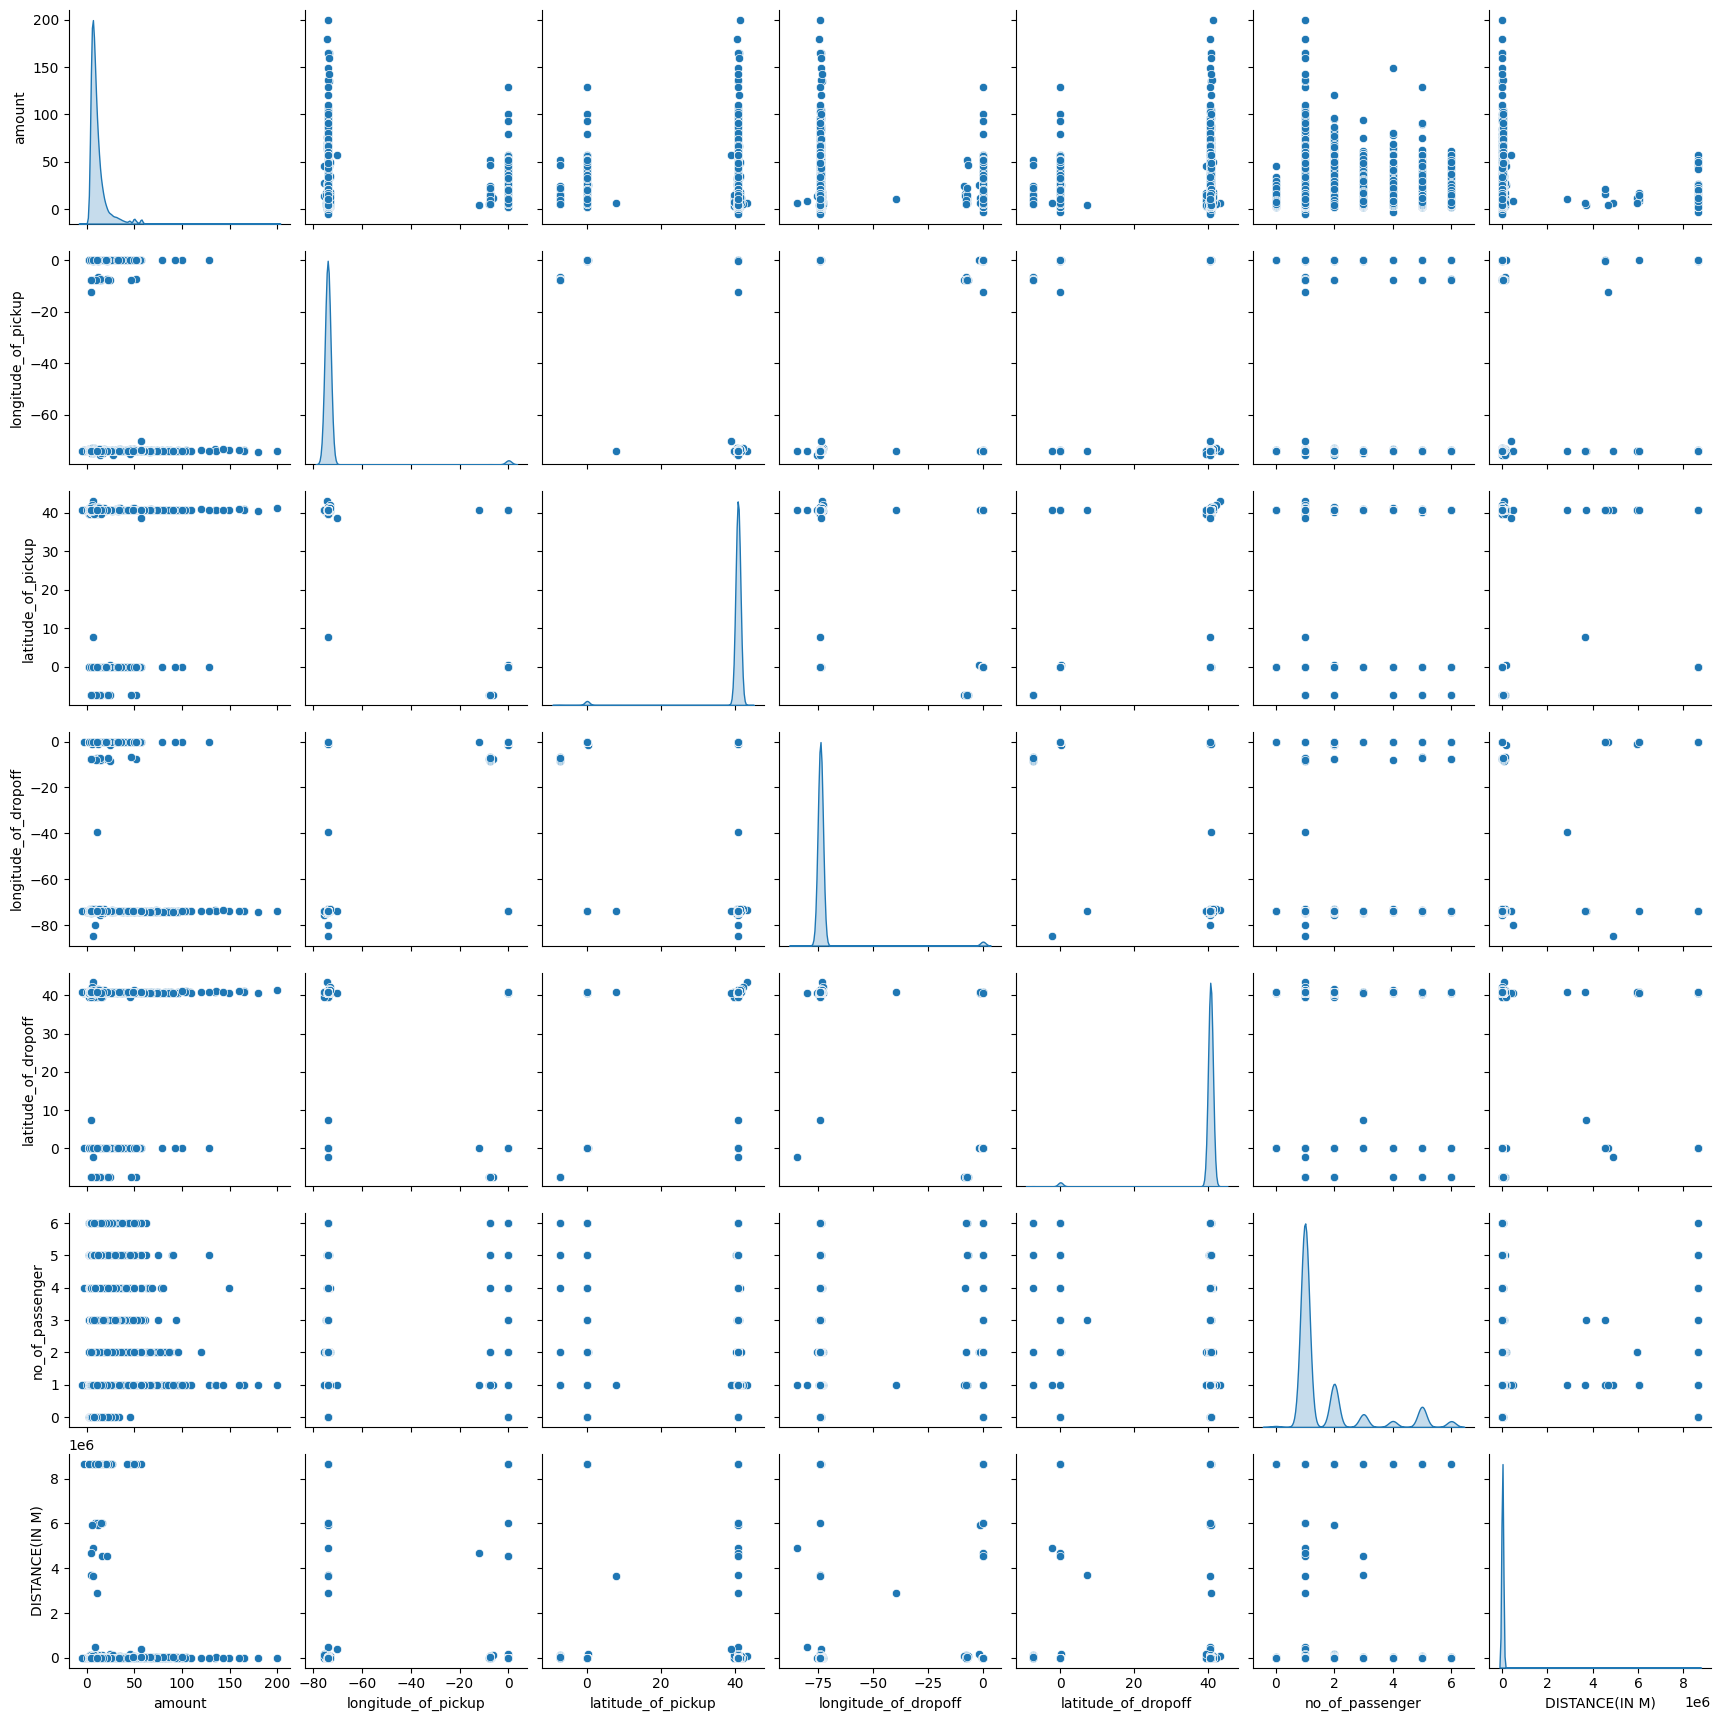

In [29]:
sns.pairplot(taxi_df,diag_kind="kde")
plt.show()

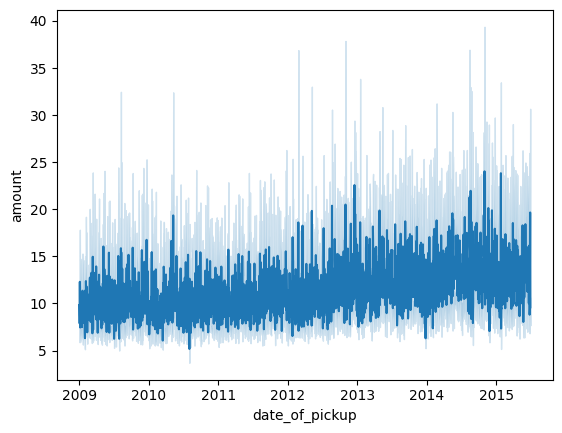

In [30]:
sns.lineplot(x='date_of_pickup', y='amount', data=taxi_df)
plt.show()

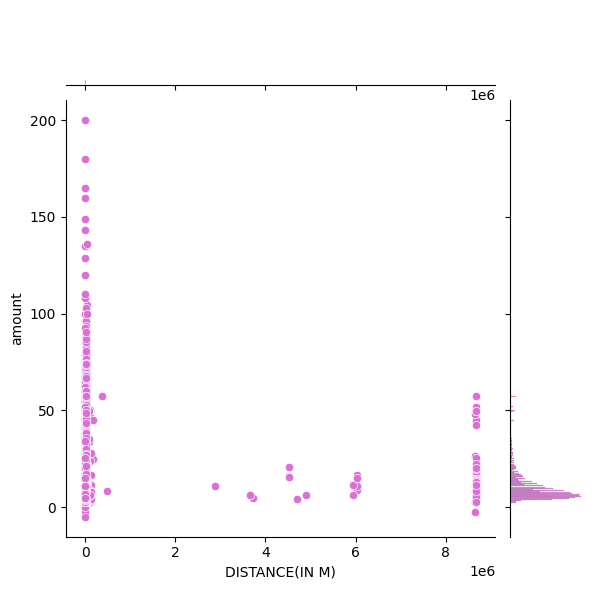

In [31]:
sns.jointplot(x='DISTANCE(IN M)',y='amount',data=taxi_df,color='orchid')
plt.show()

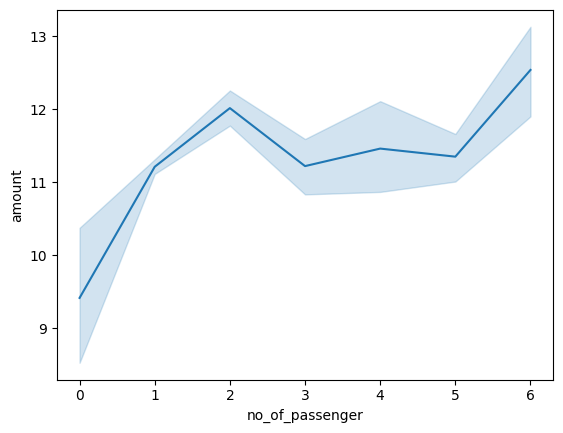

In [32]:
sns.lineplot(x='no_of_passenger', y='amount', data=taxi_df)
plt.show()

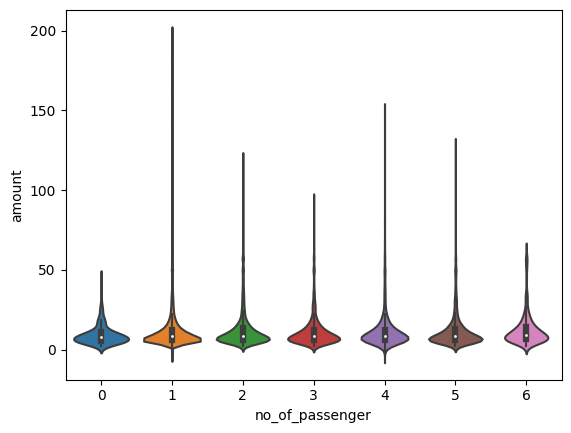

In [33]:
sns.violinplot(x='no_of_passenger', y='amount', data=taxi_df)
plt.show()

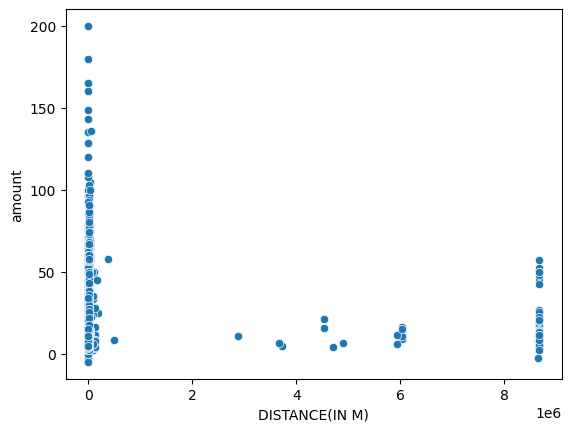

In [34]:
sns.scatterplot(x='DISTANCE(IN M)',y='amount',data=taxi_df)
plt.show()

In [35]:
def remove_outliers(col):
    sorted(col)
    q1,q3 =col.quantile([0.25,0.75])
    iqr = q3-q1
    lower = q1 - (1.5*iqr)
    upper = q3 + (1.5*iqr)
    return lower,upper

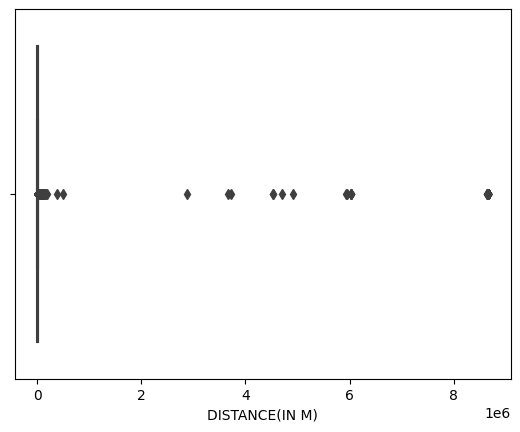

In [36]:
sns.boxplot(x=taxi_df['DISTANCE(IN M)'])
plt.show()

In [37]:
lower,upper = remove_outliers(taxi_df['DISTANCE(IN M)'])
taxi_df['DISTANCE(IN M)'] = np.where(taxi_df['DISTANCE(IN M)']<lower,lower,taxi_df['DISTANCE(IN M)'])
taxi_df['DISTANCE(IN M)'] = np.where(taxi_df['DISTANCE(IN M)']>upper,upper,taxi_df['DISTANCE(IN M)'])

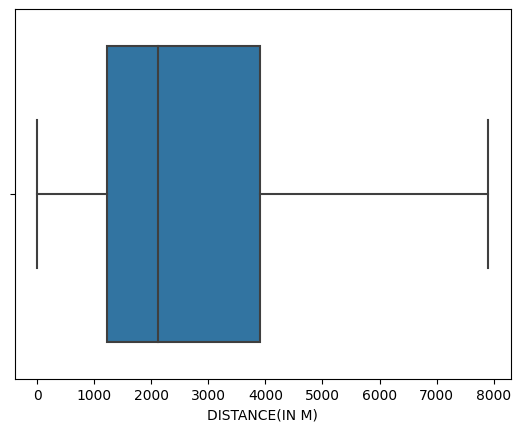

In [38]:
sns.boxplot(x=taxi_df['DISTANCE(IN M)'])
plt.show()

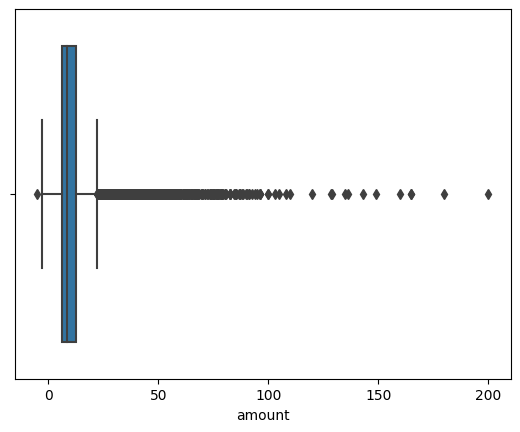

In [39]:
sns.boxplot(x=taxi_df['amount'])
plt.show()

In [40]:
lower,upper = remove_outliers(taxi_df['amount'])
taxi_df['amount'] = np.where(taxi_df['amount']<lower,lower,taxi_df['amount'])
taxi_df['amount'] = np.where(taxi_df['amount']>upper,upper,taxi_df['amount'])

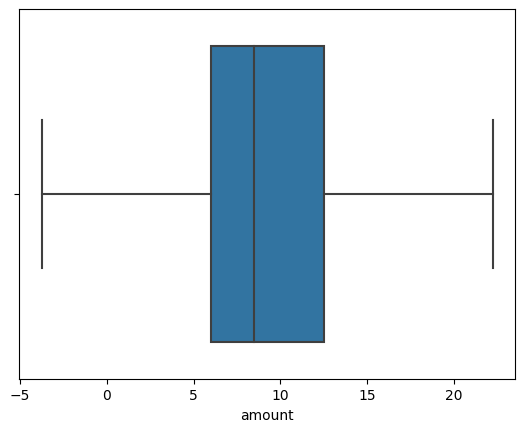

In [41]:
sns.boxplot(x=taxi_df['amount'])
plt.show()

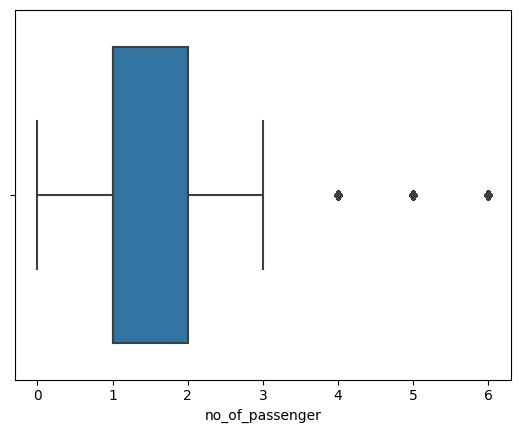

In [42]:
sns.boxplot(x=taxi_df['no_of_passenger'])
plt.show()

In [43]:
lower,upper = remove_outliers(taxi_df['no_of_passenger'])
taxi_df['no_of_passenger'] = np.where(taxi_df['no_of_passenger']<lower,lower,taxi_df['no_of_passenger'])
taxi_df['no_of_passenger'] = np.where(taxi_df['no_of_passenger']>upper,upper,taxi_df['no_of_passenger'])

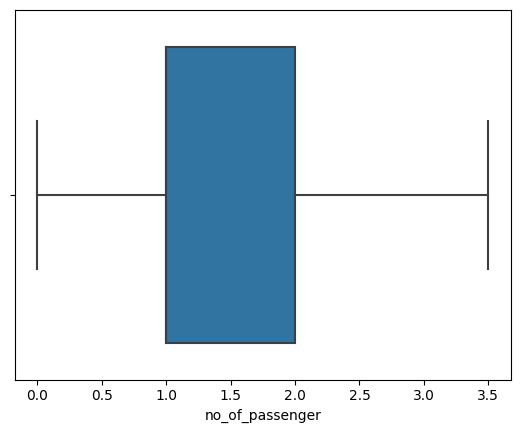

In [44]:
sns.boxplot(x=taxi_df['no_of_passenger'])
plt.show()

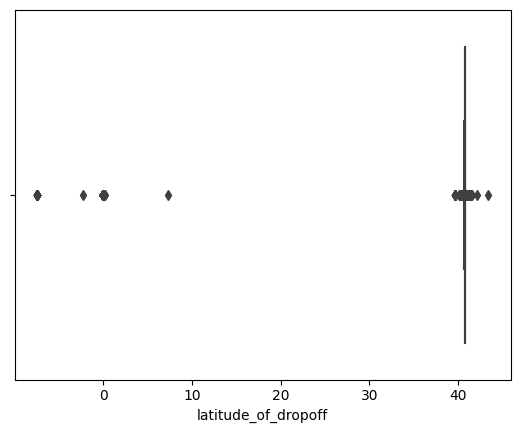

In [45]:
sns.boxplot(x=taxi_df['latitude_of_dropoff'])
plt.show()

In [46]:
lower,upper = remove_outliers(taxi_df['latitude_of_dropoff'])
taxi_df['latitude_of_dropoff'] = np.where(taxi_df['latitude_of_dropoff']<lower,lower,taxi_df['latitude_of_dropoff'])
taxi_df['latitude_of_dropoff'] = np.where(taxi_df['latitude_of_dropoff']>upper,upper,taxi_df['latitude_of_dropoff'])

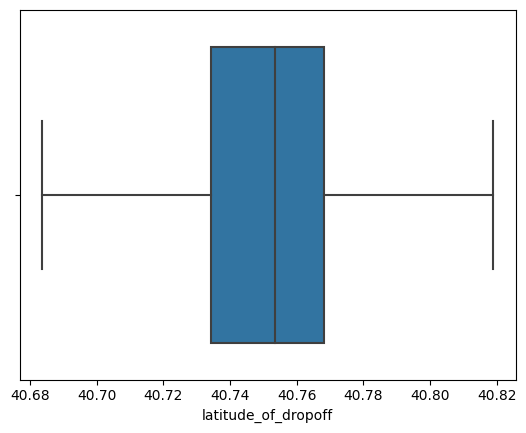

In [47]:
sns.boxplot(x=taxi_df['latitude_of_dropoff'])
plt.show()

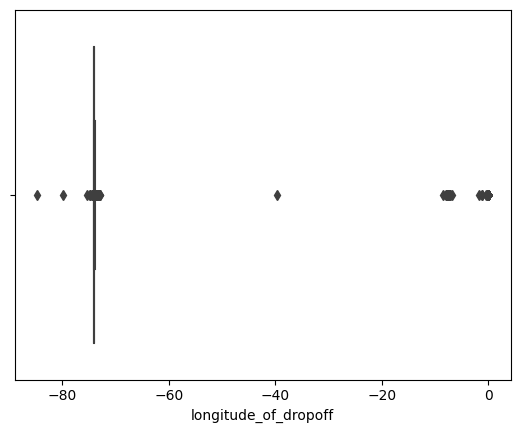

In [48]:
sns.boxplot(x=taxi_df['longitude_of_dropoff'])
plt.show()

In [49]:
lower,upper = remove_outliers(taxi_df['longitude_of_dropoff'])
taxi_df['longitude_of_dropoff'] = np.where(taxi_df['longitude_of_dropoff']<lower,lower,taxi_df['longitude_of_dropoff'])
taxi_df['longitude_of_dropoff'] = np.where(taxi_df['longitude_of_dropoff']>upper,upper,taxi_df['longitude_of_dropoff'])

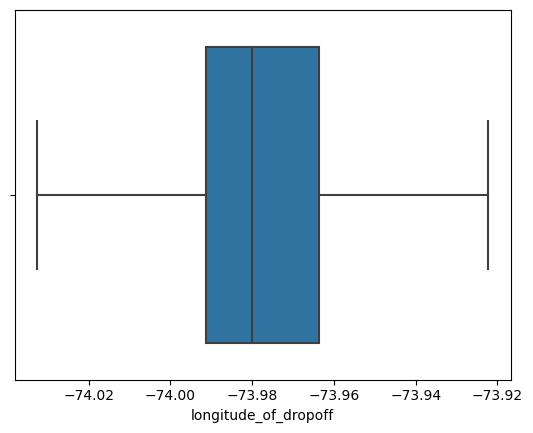

In [50]:
sns.boxplot(x=taxi_df['longitude_of_dropoff'])
plt.show()

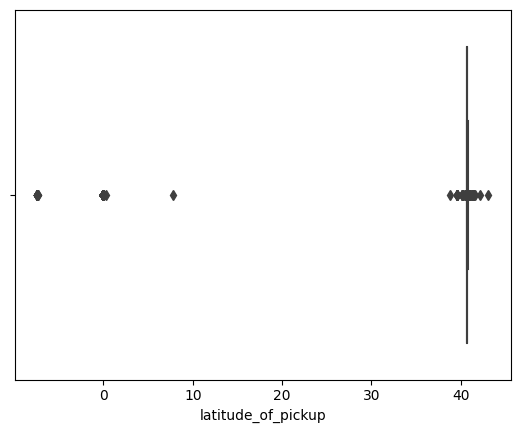

In [51]:
sns.boxplot(x=taxi_df['latitude_of_pickup'])
plt.show()

In [52]:
lower,upper = remove_outliers(taxi_df['latitude_of_pickup'])
taxi_df['latitude_of_pickup'] = np.where(taxi_df['latitude_of_pickup']<lower,lower,taxi_df['latitude_of_pickup'])
taxi_df['latitude_of_pickup'] = np.where(taxi_df['latitude_of_pickup']>upper,upper,taxi_df['latitude_of_pickup'])

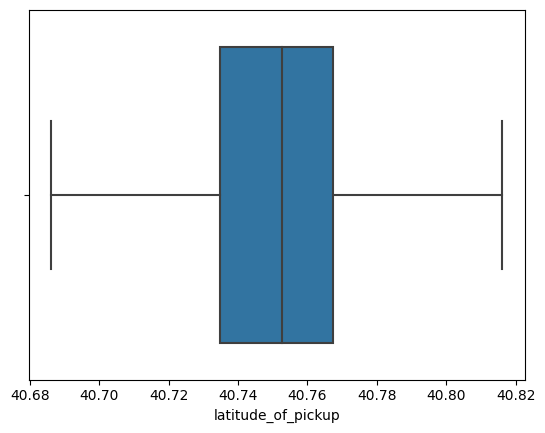

In [53]:
sns.boxplot(x=taxi_df['latitude_of_pickup'])
plt.show()

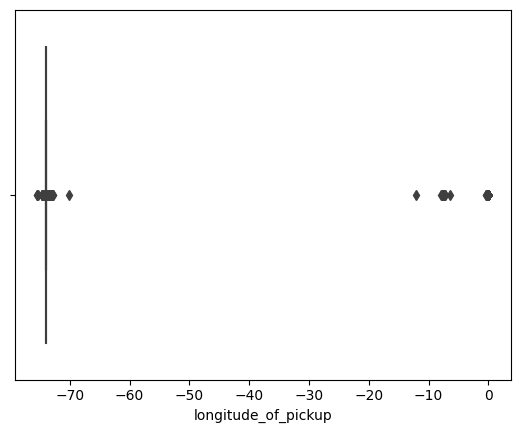

In [54]:
sns.boxplot(x=taxi_df['longitude_of_pickup'])
plt.show()

In [55]:
lower,upper = remove_outliers(taxi_df['longitude_of_pickup'])
taxi_df['longitude_of_pickup'] = np.where(taxi_df['longitude_of_pickup']<lower,lower,taxi_df['longitude_of_pickup'])
taxi_df['longitude_of_pickup'] = np.where(taxi_df['longitude_of_pickup']>upper,upper,taxi_df['longitude_of_pickup'])

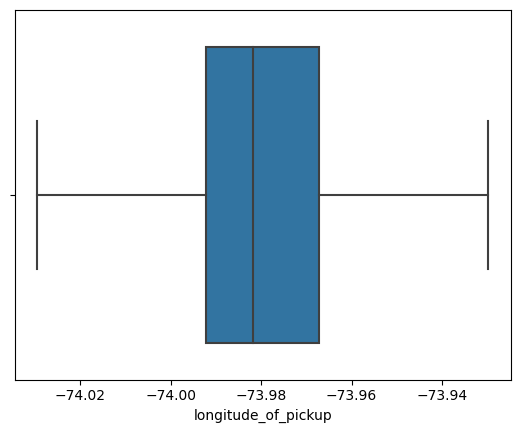

In [56]:
sns.boxplot(x=taxi_df['longitude_of_pickup'])
plt.show()

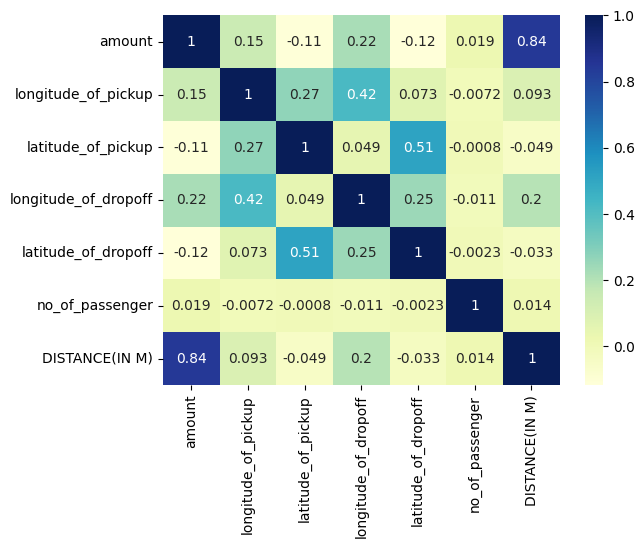

In [57]:
sns.heatmap(taxi_df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [58]:
X = taxi_df.drop(['date_of_pickup','Time_traveled','time_of_pickup','amount'],axis=1)
Y = taxi_df['amount']

In [59]:
X_train, X_test, Y_train, Y_test = split(X,Y, test_size=0.3,random_state=1)

In [60]:
model1 = LinearRegression()
model1.fit(X_train, Y_train)

LinearRegression()

In [61]:
model1.score(X_train,Y_train)

0.7287609225772154

In [62]:
model1.score(X_test,Y_test)

0.7302157867720975

In [63]:
model2 = SVR()
model2.fit(X_train, Y_train)

SVR()

In [64]:
model2.score(X_train,Y_train)

0.7168062590423258

In [65]:
model2.score(X_test,Y_test)

0.7220734968475844

In [66]:
model3 = DecisionTreeRegressor(max_depth=3)
model3.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=3)

In [67]:
model3.score(X_train,Y_train)

0.7267601853542708

In [68]:
model3.score(X_test,Y_test)

0.7254539153019147

In [69]:
model4 = AdaBoostRegressor(n_estimators=150,base_estimator=model3)
model4.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  n_estimators=150)

In [70]:
model4.score(X_train,Y_train)

0.6526618672041884

In [71]:
model4.score(X_test,Y_test)

0.6455118725641207

In [72]:
model5 = BaggingRegressor(estimator=model3,n_estimators=50)
model5.fit(X_train,Y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=3), n_estimators=50)

In [73]:
model5.score(X_train,Y_train)

0.7340635488488242

In [74]:
model5.score(X_test,Y_test)

0.7333418438905799

In [75]:
model6 = GradientBoostingRegressor()
model6.fit(X_train, Y_train)

GradientBoostingRegressor()

In [76]:
model6.score(X_train,Y_train)

0.7714371304915217

In [77]:
model6.score(X_test,Y_test)

0.7601294583929824

In [78]:
model7 = RandomForestRegressor()
model7.fit(X_train, Y_train)

RandomForestRegressor()

In [79]:
model7.score(X_train,Y_train)

0.948432467673699

In [80]:
model7.score(X_train,Y_train)

0.948432467673699

In [81]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)
y_pred6 = model6.predict(X_test)
y_pred7 = model7.predict(X_test)

In [82]:
print("THE MSE FOR MODEL 1 IS : ",mse(Y_test,y_pred1))
print("THE R2 SCORE FOR MODEL 1 IS : ",r2(Y_test,y_pred1))

THE MSE FOR MODEL 1 IS :  8.097386881929665
THE R2 SCORE FOR MODEL 1 IS :  0.7302157867720975


In [83]:
print("THE MSE FOR MODEL 2 IS : ",mse(Y_test,y_pred2))
print("THE R2 SCORE FOR MODEL 2 IS : ",r2(Y_test,y_pred2))

THE MSE FOR MODEL 2 IS :  8.341772092000966
THE R2 SCORE FOR MODEL 2 IS :  0.7220734968475844


In [84]:
print("THE MSE FOR MODEL 3 IS : ",mse(Y_test,y_pred3))
print("THE R2 SCORE FOR MODEL 3 IS : ",r2(Y_test,y_pred3))

THE MSE FOR MODEL 3 IS :  8.240311166174276
THE R2 SCORE FOR MODEL 3 IS :  0.7254539153019147


In [85]:
print("THE MSE FOR MODEL 4 IS : ",mse(Y_test,y_pred4))
print("THE R2 SCORE FOR MODEL 4 IS : ",r2(Y_test,y_pred4))

THE MSE FOR MODEL 4 IS :  10.639716381307618
THE R2 SCORE FOR MODEL 4 IS :  0.6455118725641207


In [86]:
print("THE MSE FOR MODEL 5 IS : ",mse(Y_test,y_pred5))
print("THE R2 SCORE FOR MODEL 5 IS : ",r2(Y_test,y_pred5))

THE MSE FOR MODEL 5 IS :  8.003560435969394
THE R2 SCORE FOR MODEL 5 IS :  0.7333418438905799


In [87]:
print("THE MSE FOR MODEL 6 IS : ",mse(Y_test,y_pred6))
print("THE R2 SCORE FOR MODEL 6 IS : ",r2(Y_test,y_pred6))

THE MSE FOR MODEL 6 IS :  7.19954868274384
THE R2 SCORE FOR MODEL 6 IS :  0.7601294583929824


In [88]:
print("THE MSE FOR MODEL 7 IS : ",mse(Y_test,y_pred7))
print("THE R2 SCORE FOR MODEL 7 IS : ",r2(Y_test,y_pred7))

THE MSE FOR MODEL 7 IS :  7.181859777126325
THE R2 SCORE FOR MODEL 7 IS :  0.7607188074699709
